<a href="https://colab.research.google.com/github/mdttesting98/AIandDataScienceWorkshopwithPython/blob/main/Loan_Data_Exploration_using_Logistic_Regression_and_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are tasked with using statistical and/or machine learning models to gain a deeper understanding of the loan mortgage data made public by Home Mortgage Disclosure Act (HMDA). Our data consists of all the mortgage loan applications filed in Bexar during 2020. Upon researching what others have done with similar datasets, I decided the classic excercise of loan approval classification was not only agreat way to  explore the data at hand, but also a perfect opportunity to test the benefits of using a machine learning model like Gradient Boosting  for classification in place of statistical logistic regression, while also exploring the drawbacks associated with each. Let's get started by importing the libraries that we'll need.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now let's load in the data and take a look at what we can see initially.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2020_bexar.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_original=df.copy()

In [ ]:
df.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,...,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802917e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,1,1,2,2,2,335000,NaN,3.875,NaN,3,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,45-54,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,72200,163,2331,2763,11
1,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802918e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,31,1,2,2,2,325000,NaN,3.0,NaN,2,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,...,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,35-44,35-44,No,No,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,72200,138,1558,1968,42
2,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802912e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,3,31,1,2,2,2,215000,NaN,2.25,NaN,2,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,2,2,2,2,215000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,35-44,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,72200,109,1020,1583,39
3,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802919e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,31,1,2,2,2,315000,NaN,3.0,NaN,2,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,475000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,35-44,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,72200,166,2193,2564,12
4,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802916e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,2,1,1,2,2,2,185000,NaN,4.0,NaN,3,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,2,2,2,2,185000,1,...,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,35-44,35-44,No,No,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,72200,70,1187,2012,14


In [ ]:
df.columns

Index(['activity_year', 'lei', 'derived_msa_md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open_end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'combined_loan_to_value_ratio', 'interest_rate',
       'rate_spread', 'hoepa_status', 'total_loan_costs',
       'total_points_and_fees', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_in

In [ ]:
df.shape

(145273, 99)

In [ ]:
print(df.dtypes)

activity_year                         int64
lei                                  object
derived_msa_md                        int64
state_code                           object
county_code                           int64
                                      ...  
ffiec_msa_md_median_family_income     int64
tract_to_msa_income_percentage        int64
tract_owner_occupied_units            int64
tract_one_to_four_family_homes        int64
tract_median_age_of_housing_units     int64
Length: 99, dtype: object


In [ ]:
df.describe()

,activity_year,derived_msa_md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,income,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,145273.0,145273.0,145273.0,1.445950e+05,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,1.452730e+05,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,1.084570e+05,145273.000000,145273.000000,145248.000000,23736.000000,413.000000,14.000000,5.000000,145265.000000,9952.000000,157.000000,3.000000,0.0,145273.000000,145273.000000,145252.000000,5045.000000,665.000000,107.000000,16.000000,145269.000000,2189.000000,269.000000,34.000000,4.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,145273.000000,5023.000000,1717.000000,447.000000,385.000000,145273.000000,2996.000000,302.000000,22.000000,145273.000000,145273.000000,145273.0,145273.000000,145273.000000,145273.000000,145273.000000
mean,2020.0,41700.0,48029.0,4.802916e+10,2.699869,5.339313,1.992800,1.717972,15.959986,1.043291,15.220000,15.198234,15.198716,2.298320e+05,2.432957,15.298190,15.283260,15.290969,15.296215,1.023308,1.114054,16.180027,18.122790,8.461438e+02,18.481555,21.575682,2.209456,11.184740,12.740920,13.357143,13.600000,3.746835,11.151025,12.286624,13.666667,NaN,2.185361,3.162873,5.271266,18.382557,22.825564,26.084112,31.687500,6.793493,19.379169,24.657993,25.176471,24.750000,2.184769,3.162563,1.764829,3.692758,2.185554,3.163279,14.586537,14.677387,16.909316,2.497113,2.231217,1.091723,1.077922,17.330867,4.265020,5.271523,6.000000,6330.740895,61.655101,72200.0,130.791709,1461.386211,1905.497484,23.431333
std,0.0,0.0,0.0,2.328559e+05,1.907082,16.469278,0.084548,0.862074,14.913136,0.203512,120.367947,120.370426,120.370371,4.890923e+05,0.496222,120.710513,120.712219,120.711338,120.710739,0.150880,0.452986,120.262661,120.049921,8.411068e+03,120.026028,119.661957,1.578265,1.676375,1.792161,0.744946,0.547723,1.684568,1.619088,2.121474,0.577350,NaN,0.411344,0.925554,1.945809,10.260173,11.059380,13.744379,13.098187,1.842080,9.733029,10.935451,15.617532,16.007811,0.411978,0.926408,1.012647,1.521105,0.413677,0.925843,120.439690,120.430185,120.204835,1.706788,1.313638,0.311367,0.321383,93.923128,2.822612,2.651230,2.845213,2490.749855,18.971089,0.0,52.797730,636.959803,735.964753,16.345560
min,2020.0,41700.0,48029.0,4.802911e+10,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-7.840000e+02,1

Our dataset hass 99 potential variables that we can potentially use in our model. We likely won't need even half of these variables to actually build a fairly productive model. So let's see what is going on in each of these variables. I split the data by dtypes to have a more clear picture of what exactly a particular variable represents. One dataframe contains all the float and integer valures and one contains all the values identified as objects

In [ ]:
num_df = df.select_dtypes(include=['int64', 'float64']).copy()
num_df.head()

,activity_year,derived_msa_md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,income,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,41700,48029,4.802917e+10,6,0,2,1,1,1,2,2,2,335000,3,2,2,2,2,1,3,3,5,345.0,9,9,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,72200,163,2331,2763,11
1,2020,41700,48029,4.802918e+10,6,0,2,1,31,1,2,2,2,325000,2,2,2,2,2,1,2,3,5,294.0,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,72200,138,1558,1968,42
2,2020,41700,48029,4.802912e+10,6,0,2,3,31,1,2,2,2,215000,2,2,2,2,2,1,1,3,5,NaN,9,9,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,72200,109,1020,1583,39
3,2020,41700,48029,4.802919e+10,6,0,2,1,31,1,2,2,2,315000,2,2,2,2,2,1,1,3,5,225.0,9,9,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,72200,166,2193,2564,12
4,2020,41700,48029,4.802916e+10,6,0,2,2,1,1,2,2,2,185000,3,2,2,2,2,1,1,3,5,95.0,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,72200,70,1187,2012,14


In [ ]:
num_df[num_df.isnull().any(axis=1)]

,activity_year,derived_msa_md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,income,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,41700,48029,4.802917e+10,6,0,2,1,1,1,2,2,2,335000,3,2,2,2,2,1,3,3,5,345.0,9,9,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,72200,163,2331,2763,11
1,2020,41700,48029,4.802918e+10,6,0,2,1,31,1,2,2,2,325000,2,2,2,2,2,1,2,3,5,294.0,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,72200,138,1558,1968,42
2,2020,41700,48029,4.802912e+10,6,0,2,3,31,1,2,2,2,215000,2,2,2,2,2,1,1,3,5,NaN,9,9,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,72200,109,1020,1583,39
3,2020,41700,48029,4.802919e+10,6,0,2,1,31,1,2,2,2,315000,2,2,2,2,2,1,1,3,5,225.0,9,9,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,72200,166,2193,2564,12
4,2020,41700,48029,4.802916e+10,6,0,2,2,1,1,2,2,2,185000,3,2,2,2,2,1,1,3,5,95.0,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,72200,70,1187,2012,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145268,2020,41700,48029,4.802919e+10,6,0,2,1,31,1,2,2,2,345000,2,2,2,2,2,1,1,3,5,216.0,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4886,42.24,72200,187,1287,1506,11
145269,2020,41700,48029,4.802919e+10,6,0,2,1,31,1,2,2,2,505000,2,2,2,2,2,1,1,3,5,181.0,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7042,49.90,72200,197,1867,2093,10
145270,2020,41700,48029,4.802919e+10,6,0,2,1,31,1,2,2,2,285000,2,2,2,2,2,1,1,3,5,120.0,9,9,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,72200,166,2193,2564,12
145271,2020,41700,48029,4.802918e+10,6,0,2,1,1,1,2,2,2,295000,3,2,2,2,2,1,1,3,5,132.0,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,3,3,6,NaN,NaN,Na

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,lei,state_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,combined_loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,property_value,total_units,multifamily_affordable_units,debt_to_income_ratio,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62
0,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,3.875,NaN,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,425000,1,NaN,NaN,45-54,9999,No,NaN
1,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,3.0,NaN,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,425000,1,NaN,NaN,35-44,35-44,No,No
2,254900HA4DQWAE0W3342,TX,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,2.25,NaN,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,215000,1,NaN,NaN,35-44,9999,No,NaN
3,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,3.0,NaN,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,475000,1,NaN,NaN,35-44,9999,No,NaN
4,254900HA4DQWAE0W3342,TX,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,4.0,NaN,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,185000,1,NaN,NaN,35-44,35-44,No,No


In [ ]:
obj_df[obj_df.isnull().any(axis=1)]

,lei,state_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,combined_loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,property_value,total_units,multifamily_affordable_units,debt_to_income_ratio,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62
0,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,3.875,NaN,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,425000,1,NaN,NaN,45-54,9999,No,NaN
1,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,3.0,NaN,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,425000,1,NaN,NaN,35-44,35-44,No,No
2,254900HA4DQWAE0W3342,TX,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,2.25,NaN,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,215000,1,NaN,NaN,35-44,9999,No,NaN
3,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,3.0,NaN,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,475000,1,NaN,NaN,35-44,9999,No,NaN
4,254900HA4DQWAE0W3342,TX,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,4.0,NaN,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,185000,1,NaN,NaN,35-44,35-44,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145268,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,2.75,NaN,2207.13,NaN,90.0,NaN,NaN,360,NaN,NaN,535000,1,NaN,NaN,35-44,35-44,No,No
145269,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,2.25,NaN,2048.88,NaN,0.0,NaN,NaN,180,NaN,NaN,705000,1,NaN,NaN,35-44,35-44,No,No
145270,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,2.75,NaN,1409.58,NaN,0.0,NaN,NaN,360,NaN,NaN,405000,1,NaN,NaN,45-54,9999,No,NaN
145271,254900HA4DQWAE0W3342,TX,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,3.5,NaN,6018.37,NaN,2660.0,NaN,NaN,360,NaN,NaN,375000,1,NaN,NaN,35-44,35-44,No,No


During my exploration, I ran into a concerning amount of NaN values, so i started making note of which were excessive as well as other things that stood out to me in the data.

concerning NaN data
* co_applicant_age
* co_applicant_age_above62

num data in objects
  * income
  * interest rate
  * property_value
  * total_units

check if you need to drop columns
  * applicant_ethnicity
  * co-applicant_ethnicity
  * applicant_race
  * co-applicant_race
  * aus-
  * denial_reason
  * rate_spread
  * combined_loan_to_value_ratio
  * derived_ethnicity
  * derived_race
  * derived_sex
  * discount_points
  * lender_credits
  * prepayment_penalty term
  * intro_rate_period
  * multifamily_affordable_units
  * debt_to_income_ratio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145273 entries, 0 to 145272
Data columns (total 99 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             145273 non-null  int64  
 1   lei                                       145273 non-null  object 
 2   derived_msa_md                            145273 non-null  int64  
 3   state_code                                145273 non-null  object 
 4   county_code                               145273 non-null  int64  
 5   census_tract                              144595 non-null  float64
 6   conforming_loan_limit                     145056 non-null  object 
 7   derived_loan_product_type                 145273 non-null  object 
 8   derived_dwelling_category                 145273 non-null  object 
 9   derived_ethnicity                         145273 non-null  object 
 10  derived_race        

these are the variables with the greatest number of null values in our dataset
* co_applicant_ethnicity_2 -                 9952 non-null    float64
* co_applicant_ethnicity_3 -                 157 non-null     float64
* co_applicant_ethnicity_4 -                 3 non-null       float64
* co_applicant_ethnicity_5 -                 0 non-null       float64

* applicant_ethnicity_2    -                 23736 non-null   float64
* applicant_ethnicity_3     -                413 non-null     float64
* applicant_ethnicity_4      -               14 non-null      float64
* applicant_ethnicity_5       -              5 non-null       float64

* applicant_race_2          -                5045 non-null    float64
* applicant_race_3           -               665 non-null     float64
* applicant_race_4            -              107 non-null     float64
* applicant_race_5             -             16 non-null      float64

* co_applicant_race_2        -               2189 non-null    float64
* co_applicant_race_3         -              269 non-null     float64
* co_applicant_race_4          -             34 non-null      float64
* co_applicant_race_5           -            4 non-null       float64

* aus_2                       -              5023 non-null    float64
* aus_3                        -             1717 non-null    float64
* aus_4                         -            447 non-null     float64
* aus_5                          -           385 non-null     float64

* denial_reason_2           -                2996 non-null    float64
* denial_reason_3            -               302 non-null     float64
* denial_reason_4             -              22 non-null      float64

* prepayment_penalty_term          -         1801 non-null    object

* intro_rate_period                   -      6139 non-null    object 

* multifamily_affordable_units  -           1820 non-null    object

While looking through the data, I found the variable action_taken which seemed to be the variable the HMDA used to represent approval outcome, so I tested it as a target variable for our model.

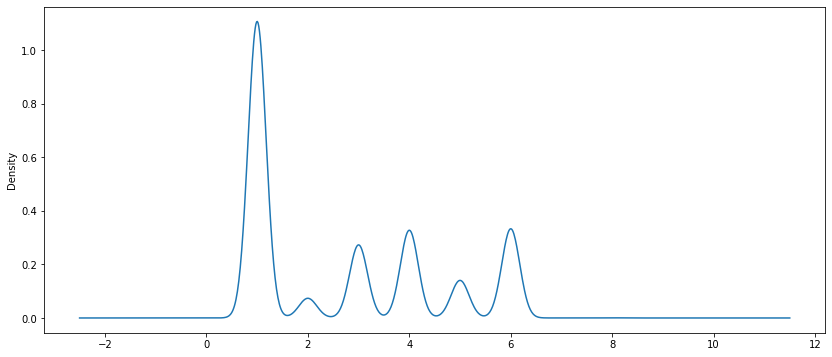

In [ ]:
df['action_taken'].plot(kind='density', figsize=(14,6))

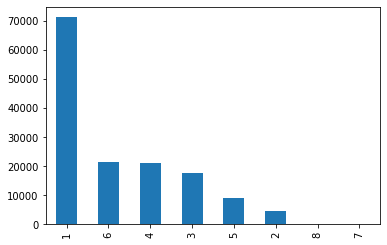

In [ ]:
df['action_taken'].value_counts().plot.bar()

In [ ]:
df['action_taken'].value_counts(normalize=True) 

1    0.490910
6    0.147694
4    0.145237
3    0.121014
5    0.062207
2    0.032608
8    0.000241
7    0.000089
Name: action_taken, dtype: float64

Let's look at what these values mean (from the HMDA documentation):

Description: The action taken on the covered loan or application

Values:

1 - Loan originated

2 - Application approved but not accepted

3 - Application denied

4 - Application withdrawn by applicant

5 - File closed for incompleteness

6 - Purchased loan

7 - Preapproval request denied

8 - Preapproval request approved but not accepted

In [ ]:
.513283 + 0.032608

0.545891

For our purposes we'll be looking at values 1 and 2 as approved for our model and everything else as not approved (there are some business arrangements type loans that were approved in reality but we are only concerned with personal homebuyer type loans). The split between approved and not approved in our model is nearly 50/50 signifying action_taken would be a healthy target variable for our model. Let's see what correlations we can already see in regards to this target variable.

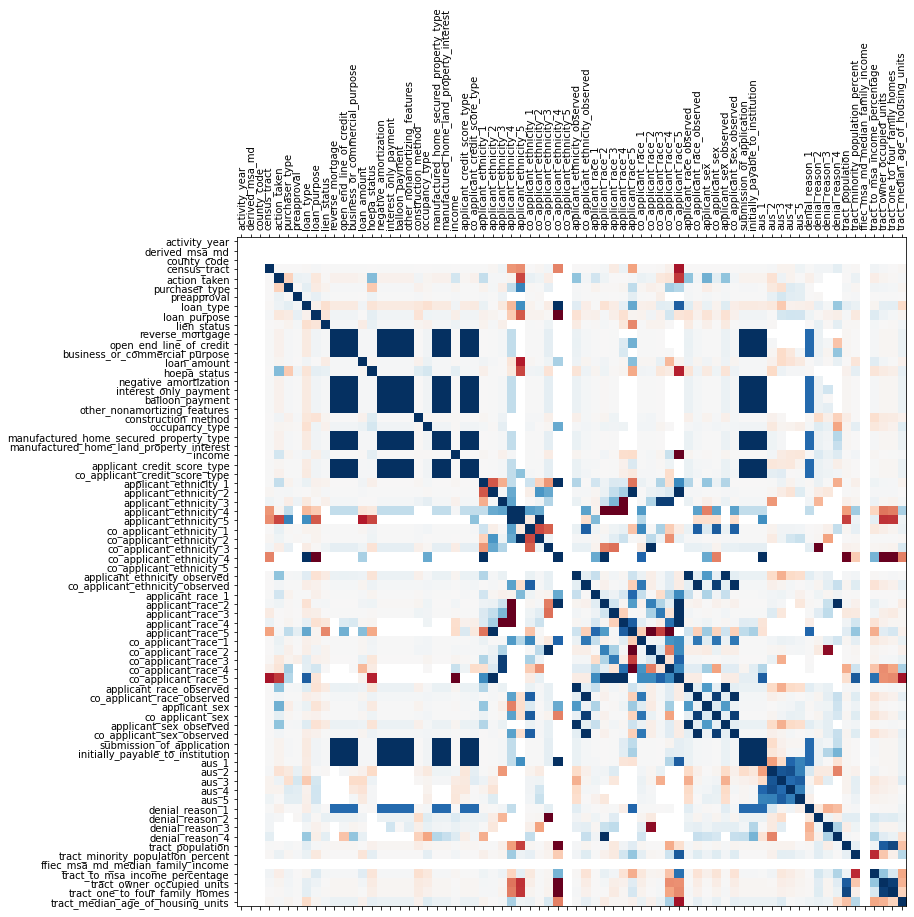

In [ ]:
corr = df.corr()
corr

fig = plt.figure(figsize=(12,12))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation= 'vertical')
plt.yticks(range(len(corr.columns)), corr.columns);

action taken strong correlations
* hoepa_status
* income
* applicant ethnicity
* applicant ethnicity observed
* applicant race
* applicant race observed
* applicant sex
* applicant sex observed

denial reason strong correlations
* reverse mortgage
* open end line of credit
* business or commercial purposes
* negative ammortization
* interest only payment
* balloon payment
* manufactured home secured property type
* manufactured home land property interest
* applicant credit score type
* co appclicant credit score type
* applicant race 5
* submission of application
* initially payable to the institution
* aus_1

Looking at the correlation maps, action_taken is currently making strong correlations with many variables we wouldn't expect to see in a loan approval model. However denial_reason_1 does seem to be closer to what we're looking for, so let's test it as our target variable.

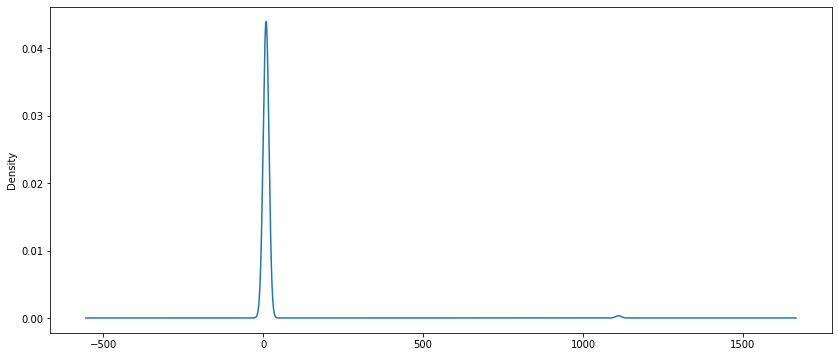

In [ ]:
df['denial_reason_1'].plot(kind='density', figsize=(14,6))

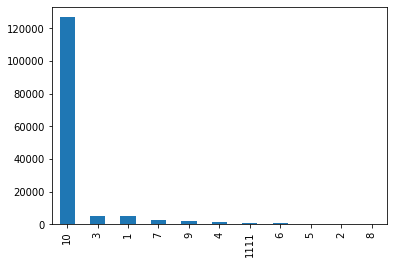

In [ ]:
df['denial_reason_1'].value_counts().plot.bar()

1. - Debt-to-income ratio
2. - Employment history
3. - Credit history
4. - Collateral
5. - Insufficient cash (downpayment, closing costs)
6. - Unverifiable information
7. - Credit application incomplete
8. - Mortgage insurance denied
9. - Other
10. - Not applicable

In [ ]:
df['denial_reason_1'].describe()

count    145273.000000
mean         17.330867
std          93.923128
min           1.000000
25%          10.000000
50%          10.000000
75%          10.000000
max        1111.000000
Name: denial_reason_1, dtype: float64

It's clear action_taken is a better target variable for our model, but the correlations on the denial_reason_1 variable are more typical of what we would expect to see in a loan approval model. We will drop non-correllated variables such as age and some variables such as ethnicity/race and sex, which happen to just be filled on every application, so that we can encourage stronger relationships with meaningful variables. We see some variables like co-applicant_ethnicity_5 that have low correlation with anything else in the data anyway.

In [ ]:
drop_df = df.drop(['activity_year', 'derived_msa_md', 'lei', 'county_code', 'state_code', 'ffiec_msa_md_median_family_income',
         'applicant_ethnicity_1','applicant_ethnicity_2', 'applicant_ethnicity_3','applicant_ethnicity_4', 'applicant_ethnicity_5',
         'co_applicant_ethnicity_1', 'co_applicant_ethnicity_2', 'co_applicant_ethnicity_3', 'co_applicant_ethnicity_4', 'co_applicant_ethnicity_5',
         'applicant_ethnicity_observed', 'co_applicant_ethnicity_observed','applicant_race_1', 'applicant_race_2', 'applicant_race_3', 'applicant_race_4', 
         'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4','co_applicant_race_5', 
         'applicant_race_observed', 'co_applicant_race_observed','derived_ethnicity', 'derived_race', 'derived_sex', 'applicant_sex', 'co_applicant_sex', 
         'applicant_sex_observed', 'co_applicant_sex_observed', 'applicant_age','co_applicant_age', 'applicant_age_above_62', 'co_applicant_age_above_62'], axis=1)



In [ ]:
drop_df.head()

,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,4.802917e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,1,1,2,2,2,335000,NaN,3.875,NaN,3,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,3,3,5,1,NaN,345.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,163,2331,2763,11
1,4.802918e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,325000,NaN,3.0,NaN,2,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,2,3,5,1,NaN,294.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,138,1558,1968,42
2,4.802912e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,215000,NaN,2.25,NaN,2,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,2,2,2,2,215000,1,1,3,5,1,NaN,NaN,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,109,1020,1583,39
3,4.802919e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,315000,NaN,3.0,NaN,2,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,475000,1,1,3,5,1,NaN,225.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,166,2193,2564,12
4,4.802916e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,2,1,1,2,2,2,185000,NaN,4.0,NaN,3,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,2,2,2,2,185000,1,1,3,5,1,NaN,95.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,70,1187,2012,14


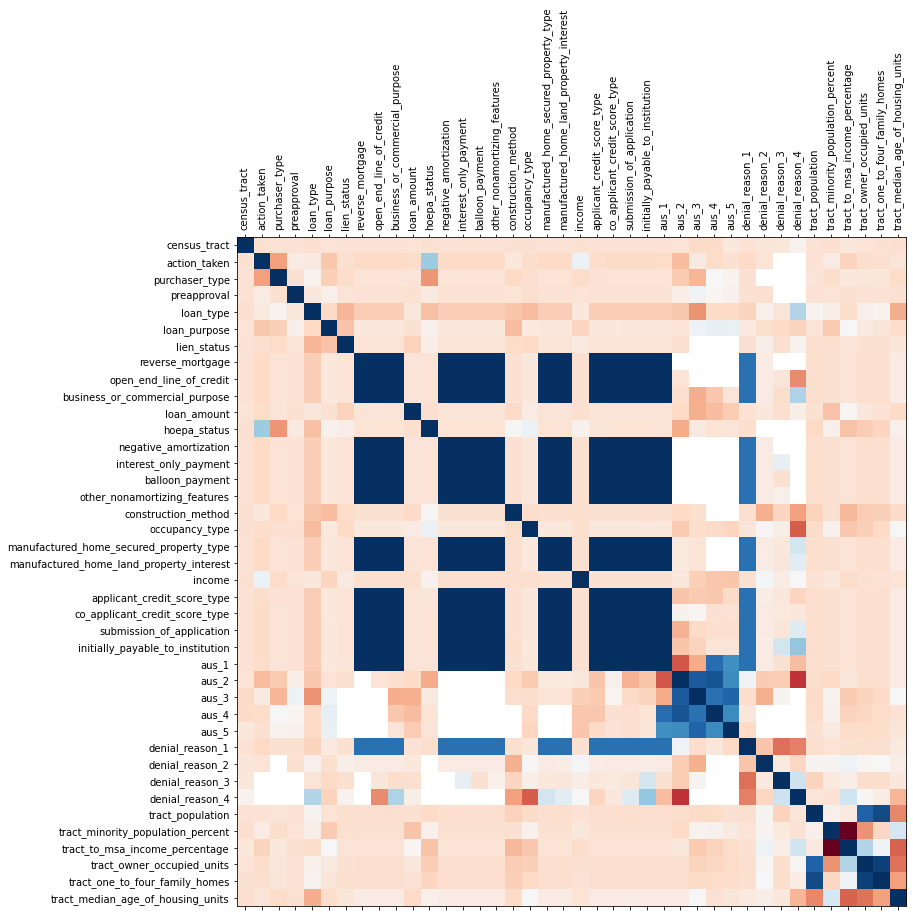

In [ ]:
corr_drop = drop_df.corr()
corr_drop

fig = plt.figure(figsize=(12,12))
plt.matshow(corr_drop, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr_drop.columns)), corr_drop.columns, rotation= 'vertical')
plt.yticks(range(len(corr_drop.columns)), corr_drop.columns);

We can see action_taken making stronger financial-driven correlations with the data now that most of the unneccessary information is dropped. The correlation maps for action taken are no more closely following that of denial reason 1 so we are on the right track.

In [ ]:
model_df = drop_df

In [ ]:
model_df.head()

,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,4.802917e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,1,1,2,2,2,335000,NaN,3.875,NaN,3,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,3,3,5,1,NaN,345.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,163,2331,2763,11
1,4.802918e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,325000,NaN,3.0,NaN,2,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,2,3,5,1,NaN,294.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,138,1558,1968,42
2,4.802912e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,215000,NaN,2.25,NaN,2,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,2,2,2,2,215000,1,1,3,5,1,NaN,NaN,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,109,1020,1583,39
3,4.802919e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,315000,NaN,3.0,NaN,2,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,475000,1,1,3,5,1,NaN,225.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,166,2193,2564,12
4,4.802916e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,2,1,1,2,2,2,185000,NaN,4.0,NaN,3,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,2,2,2,2,185000,1,1,3,5,1,NaN,95.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,70,1187,2012,14


(1) is the variables we could not fit to our logistic regression model.
* purchaser_type
* preapproval
* loan_type
* loan_purpose
* lien_status
* reverse_mortgage (1)
* open_end_line_of_credit (1)
* business_or_commercial_purpose (1)
* hoepa_status
* negative_amortization (1)
* interest_only_payment (1)
* balloon_payment (1)
* other_nonamortizing_features (!)
* construction_method
* occupancy_type
* manufactured_home_secured_property_type (1)
* manufactured_home_land_property_interest (1)
* applicant_credit_score_type (1)
* co_applicant_credit_score_type (1)
* submission_of_application
* initially_payable_to_institution
* aus_1
* denial_reason_1

numerical
* loan_amount
* income
* tract_population
* tract_minority_population_percent
* tract_to_msa_income_percentage
* tract_owner_occupied_units
* tract_one_to_four_family_homes
* tract_median_age_of_housing_units

In [ ]:
model_df['action_taken_target'] = np.where(model_df['action_taken'] <= 2, 1, 0)

In [ ]:
model_df.head()

,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,action_taken_target
0,4.802917e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,1,1,2,2,2,335000,NaN,3.875,NaN,3,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,3,3,5,1,NaN,345.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,163,2331,2763,11,0
1,4.802918e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,325000,NaN,3.0,NaN,2,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,2,3,5,1,NaN,294.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,138,1558,1968,42,0
2,4.802912e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,215000,NaN,2.25,NaN,2,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,2,2,2,2,215000,1,1,3,5,1,NaN,NaN,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,109,1020,1583,39,0
3,4.802919e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,315000,NaN,3.0,NaN,2,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,475000,1,1,3,5,1,NaN,225.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,166,2193,2564,12,0
4,4.802916e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,2,1,1,2,2,2,185000,NaN,4.0,NaN,3,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,2,2,2,2,185000,1,1,3,5,1,NaN,95.0,NaN,9,9,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,70,1187,2012,14,0


In [ ]:
logit1 = smf.logit("""action_taken_target ~ C(purchaser_type) + C(preapproval) 
+ C(loan_type) + C(loan_purpose) + C(lien_status)
+ C(hoepa_status) + C(construction_method) 
+ C(occupancy_type) + C(applicant_credit_score_type) 
+ C(aus_1) + C(denial_reason_1) + loan_amount 
+ income + tract_population + tract_minority_population_percent 
+ tract_to_msa_income_percentage + tract_owner_occupied_units  
+ tract_one_to_four_family_homes + tract_median_age_of_housing_units""",
 data=model_df).fit()


         Current function value: 0.039856
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The data structure prevents us from performing logistic regression using many of the variables we observed as likely to explain our classification, so i chose to use applicant_credit_type as the variable to explain all these highly correlated variables.

In [ ]:
logit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     action_taken_target   No. Observations:               108457
Model:                           Logit   Df Residuals:                   108399
Method:                            MLE   Df Model:                           57
Date:                 Thu, 11 Nov 2021   Pseudo R-squ.:                  0.9419
Time:                         07:28:40   Log-Likelihood:                -4322.7
converged:                       False   LL-Null:                       -74415.
Covariance Type:             nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -11.8777   1.88e+04     -0.001      0.999   -3.69e+04    3.69e+04
C(purchaser_type)[T.1]                     1.2904      0.116     11.110      0.000       1.063       1.518
C(purchaser_type)[T.2]                     2.8219      0.137     20.588      0.000       2.553       3.091
C(purchaser_type)[T.3]                     0.7748      0.121      6.384      0.000       0.537       1.013
C(purchaser_type)[T.5]                     9.0760      0.978      9.284      0.000       7.160      10.992
C(purchaser_type)[T.6]                     5.2440      0.600      8.746      0.000       4.069       6.419
C(purchaser_type)[T.8]                    -0.6065      0.311     -1.951      0.051      -1.216       0.003
C(purchaser_type)[T.9]                     0.9726      0.178      5.467      0.000       0.624       1.321
C(purchaser_type)[T.71]                    3.6841      0.220     16.770      0.000       3.254       4.115
C(purchaser_type)[T.72]                   13.1484    101.457      0.130      0.897    -185.705     212.001
C(preapproval)[T.2]                        0.8883      0.323      2.746      0.006       0.254       1.522
C(loan_type)[T.2]                          0.8423      0.132      6.391      0.000       0.584       1.101
C(loan_type)[T.3]                          0.3433      0.126      2.725      0.006       0.096       0.590
C(loan_type)[T.4]                          1.4951      0.643      2.327      0.020       0.236       2.755
C(loan_purpose)[T.2]                       2.4117      0.223     10.795      0.000       1.974       2.850
C(loan_purpose)[T.4]                       1.8415      0.269      6.850      0.000       1.315       2.368
C(loan_purpose)[T.5]                       0.6711      1.082      0.620      0.535      -1.450       2.792
C(loan_purpose)[T.31]                      1.5024      0.072     20.931      0.000       1.362       1.643
C(loan_purpose)[T.32]                      0.8518      0.124      6.861      0.000       0.608       1.095
C(lien_status)[T.2]                        2.1221      0.181     11.733      0.000       1.768       2.477
C(hoepa_status)[T.2]                     -19.4952   1.82e+04     -0.001      0.999   -3.56e+04    3.56e+04
C(hoepa_status)[T.3]                     -24.3004   1.82e+04     -0.001      0.999   -3.56e+04    3.56e+04
C(construction_method)[T.2]                3.5521      0.211     16.846      0.000       3.139       3.965
C(occupancy_type)[T.2]                     2.7794      0.170     16.320      0.000       2.446       3.113
C(occupancy_type)[T.3]                     1.7588      0.112     15.714      0.000       1.539       1.978
C(applicant_credit_score_type)[T.2]       -0.4862      0.488     -0.997      0.319      -1.442       0.470
C(applicant_credit_score_type)[T.3]        0.2996      0.558      0.537      0.591      -0.794       1.393
C(applicant_credit_sco

In [ ]:
model_train, model_test = train_test_split(model_df, test_size = 0.2, random_state = 20211104, 
                               shuffle=True, stratify = model_df['action_taken_target'])


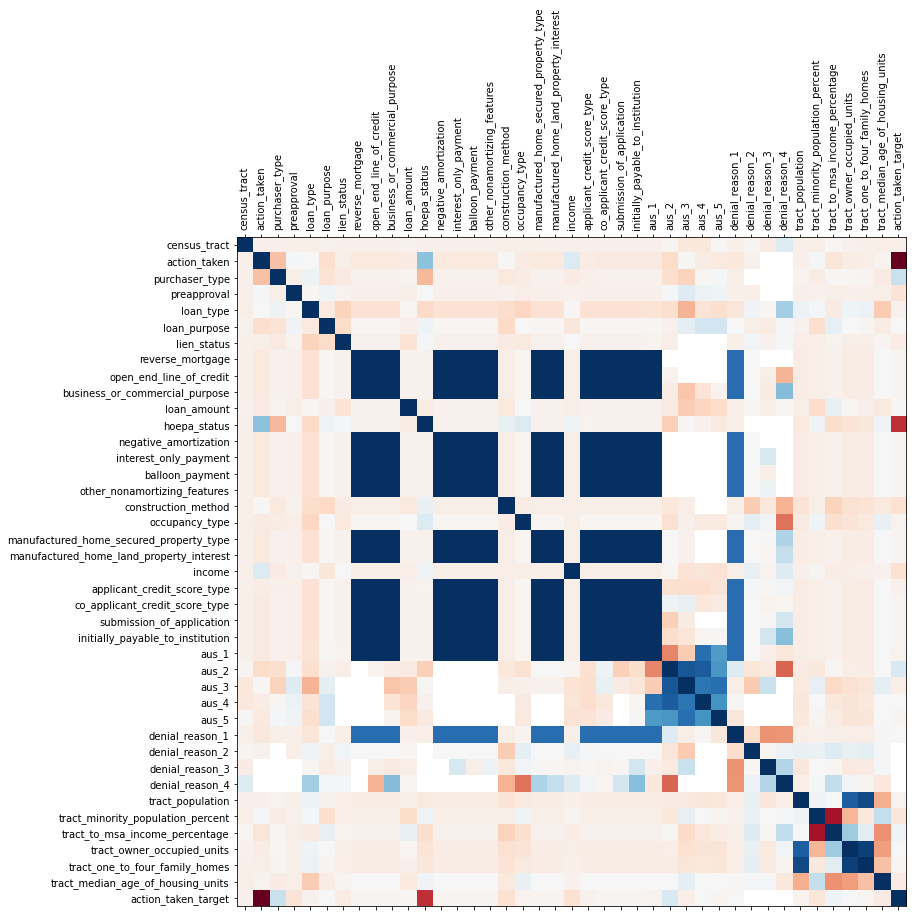

In [ ]:
corr_train = model_train.corr()
corr_train

fig = plt.figure(figsize=(12,12))
plt.matshow(corr_train, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr_train.columns)), corr_train.columns, rotation= 'vertical')
plt.yticks(range(len(corr_train.columns)), corr_train.columns);

In [ ]:
logit_predict = logit1.predict(model_test)

In [ ]:
action_taken_predict = np.where(logit_predict < 0.5, 0, 1)

print(confusion_matrix(model_test['action_taken_target'], action_taken_predict))

[[ 9553  4291]
 [  133 15078]]


Our confusion matrix displays exactly what's going on in our model and why we might want to use a machine learning model. Our model is classifying denials fairly accurately at the moment, but the limitations of logistic regressions are clearly being shown in the misclassification of 4291 denials that should have been approved. By using a machine learning algorithm like the Gradient Boosting Classifier, we can use more of these categorical financial variables and hopefully have a more accurate model.

In [ ]:
print(classification_report(model_test['action_taken_target'], action_taken_predict, digits=3))

              precision    recall  f1-score   support

           0      0.986     0.690     0.812     13844
           1      0.778     0.991     0.872     15211

    accuracy                          0.848     29055
   macro avg      0.882     0.841     0.842     29055
weighted avg      0.877     0.848     0.843     29055



In [ ]:
GB_model_df = model_df.drop(['census_tract', 'submission_of_application', 'aus_2',
                            'aus_3', 'aus_4', 'aus_5', 'denial_reason_2', 'denial_reason_3',
                            'denial_reason_4', "combined_loan_to_value_ratio", "rate_spread",
                            'total_points_and_fees', 'discount_points', 'lender_credits',
                            'prepayment_penalty_term', 'intro_rate_period', 'multifamily_affordable_units',
                            'debt_to_income_ratio',], axis=1)

I went ahead and dropped all the unnecessary columns according to our discoveries through regression for the gradient boosted model. I unfortanetly had to drop income as well because there was a significant number of NaN values that our gradient boosting model can't handle. On our original correlation maps, we found that income was already highly correlated with the outcome of our classification but let's try fitting what we can to our model.

In [ ]:
GB_model_df.head()

,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,interest_rate,hoepa_status,total_loan_costs,origination_charges,loan_term,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,applicant_credit_score_type,co_applicant_credit_score_type,initially_payable_to_institution,aus_1,denial_reason_1,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,action_taken_target
0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,1,1,2,2,2,335000,3.875,3,6266.76,2069.84,360,2,2,2,2,425000,1,3,3,5,1,345.0,9,9,3,6,10,7751,56.84,163,2331,2763,11,0
1,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,325000,3.0,2,2662.7,0.0,360,2,2,2,2,425000,1,2,3,5,1,294.0,9,9,3,6,10,4610,42.69,138,1558,1968,42,0
2,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,215000,2.25,2,4033.44,1346.04,360,2,2,2,2,215000,1,1,3,5,1,NaN,9,9,3,6,10,4664,63.14,109,1020,1583,39,0
3,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,315000,3.0,2,1868.5,0.0,360,2,2,2,2,475000,1,1,3,5,1,225.0,9,9,3,6,10,11921,45.05,166,2193,2564,12,0
4,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,2,1,1,2,2,2,185000,4.0,3,7610.72,1595.0,360,2,2,2,2,185000,1,1,3,5,1,95.0,9,9,3,6,10,7623,85.54,70,1187,2012,14,0


In [ ]:
GB_model_df[GB_model_df.isnull().any(axis=1)]

,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,interest_rate,hoepa_status,total_loan_costs,origination_charges,loan_term,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,applicant_credit_score_type,co_applicant_credit_score_type,initially_payable_to_institution,aus_1,denial_reason_1,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,action_taken_target
2,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,215000,2.25,2,4033.44,1346.04,360,2,2,2,2,215000,1,1,3,5,1,NaN,9,9,3,6,10,4664,63.14,109,1020,1583,39,0
78,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,195000,3.0,3,3965.1,1595.0,360,2,2,2,2,195000,1,1,3,5,1,NaN,9,9,3,6,10,6653,56.47,105,1766,2354,35,0
98,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,245000,2.75,3,4489.33,1595.0,360,2,2,2,2,265000,1,1,3,5,1,NaN,9,9,3,6,10,1665,37.18,184,609,767,54,0
127,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,335000,3.0,2,5095.6,1595.0,360,2,2,2,2,335000,1,1,3,5,1,NaN,9,9,3,6,10,10590,59.75,151,2586,3268,11,0
189,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,445000,2.75,2,4037.25,1595.0,360,2,2,2,2,435000,1,1,3,5,1,NaN,9,9,3,6,10,6740,36.16,238,1896,2277,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145244,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,2,31,1,2,2,2,155000,4.5,3,4014.18,0.0,360,2,2,2,2,NaN,1,1,3,5,1,0.0,9,9,3,6,10,4801,59.18,122,1308,1555,20,0
145247,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,2,31,1,2,2,2,175000,3.625,3,4361.71,0.0,360,2,2,2,2,NaN,1,1,3,5,1,0.0,9,9,3,6,10,4248,66.85,84,986,1429,31,0
145259,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,265000,2.75,2,1628.25,0.0,300,2,2,2,2,305000,1,1,3,5,1,NaN,9,9,3,6,10,10923,53.68,163,2788,3211,9,0
145262,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,3,31,1,2,2,2,215000,2.5,2,1432.5,0.0,360,2,2,2,2,285000,1,1,3,5,1,NaN,9,9,3,6,10,5194,80.19,71,1084,1674,32,0


In [ ]:
X = GB_model_df[["purchaser_type", "preapproval", "loan_type", "loan_purpose",
                 "lien_status", "hoepa_status", "construction_method", "occupancy_type",
                 "applicant_credit_score_type", "denial_reason_1", "aus_1", "loan_amount", 
                 "tract_population", "tract_minority_population_percent",
                 "tract_to_msa_income_percentage", "tract_owner_occupied_units", 
                 "tract_one_to_four_family_homes", "tract_median_age_of_housing_units",
                 "co_applicant_credit_score_type", "manufactured_home_land_property_interest",
                 "manufactured_home_secured_property_type", "reverse_mortgage",
                 "open_end_line_of_credit", "business_or_commercial_purpose",
                 "negative_amortization", "interest_only_payment", "balloon_payment",
                 "other_nonamortizing_features"]]
Y = GB_model_df[["action_taken_target"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state= 20211104, 
                               shuffle=True, stratify = GB_model_df['action_taken_target'])

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(Xtrain, np.ravel(ytrain, order='C'))
ypred = gbc.predict(Xtest)

In [ ]:
print(gbc.score(Xtest, ytest))

0.9822682342575512


In [ ]:
print(confusion_matrix(ytest, ypred))

[[16916   389]
 [  255 18759]]


Really good without any income information, now let's try to see what our accuracy looks like with the income information. I will impute the NaN values by on the mean of the incomes in their associated applicant_credit_score_type category. I am assuming people within similar credit categories should have comparable income to the average in that category.

In [ ]:
GB_model_df.groupby('applicant_credit_score_type')['income'].mean()

applicant_credit_score_type
1        109.664461
2        102.701463
3        109.603681
4         85.062500
5        140.500000
6        156.368421
7        111.446515
8         90.506924
9       2277.791547
1111     193.664778
Name: income, dtype: float64

In [ ]:
GB_model_df['income'] = GB_model_df.groupby('applicant_credit_score_type').transform(lambda x: x.fillna(x.mean()))

In [ ]:
GB_model_df[GB_model_df.isnull().any(axis=1)]

,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,interest_rate,hoepa_status,total_loan_costs,origination_charges,loan_term,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,applicant_credit_score_type,co_applicant_credit_score_type,initially_payable_to_institution,aus_1,denial_reason_1,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,action_taken_target
210,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,1,1,2,2,2,105000,3.5,2,NaN,3595.0,360,2,2,2,2,125000,1,3,3,5,1,6.0,9,9,3,6,10,4590,92.72,63,707,1257,42,0
301,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,71,2,1,31,1,2,2,1,185000,3.25,3,NaN,NaN,360,2,2,2,1,315000,1,3,3,5,1,1.0,2,10,1,2,10,5554,66.37,136,1445,1652,9,1
302,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,4,0,2,1,31,1,2,2,2,315000,NaN,3,NaN,NaN,360,2,2,2,2,NaN,1,1,3,5,1,4.0,9,9,1,6,10,5548,49.59,143,1213,1504,28,0
303,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,4,0,2,1,31,1,2,2,2,235000,NaN,3,NaN,NaN,360,2,2,2,2,NaN,1,1,3,5,1,4.0,9,9,1,6,10,8416,69.63,136,2301,2723,19,0
306,C,VA:First Lien,Single Family (1-4 Units):Site-Built,2,0,2,3,31,1,2,2,2,175000,2.99,3,NaN,NaN,360,2,2,2,2,NaN,1,1,3,5,1,2.0,2,10,1,6,10,8299,79.00,111,1767,2453,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145113,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,2,31,1,2,2,2,165000,2.625,2,5916.92,1545.0,360,2,2,2,2,NaN,1,1,3,5,1,6.0,9,9,3,6,10,5272,39.57,99,1195,1721,31,0
145161,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,135000,3.625,2,NaN,4112.42,360,2,2,2,2,175000,1,3,3,5,1,6.0,9,9,3,6,10,9979,75.88,87,1874,2348,17,0
145225,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,1,31,1,2,2,2,205000,2.75,2,NaN,6165.0,360,2,2,2,2,305000,1,3,3,5,1,6.0,9,9,3,6,10,5240,47.69,126,1453,1818,27,0
145244,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,0,2,2,31,1,2,2,2,155000,4.5,3,4014.18,0.0,360,2,2,2,2,NaN,1,1,3,5,1,6.0,9,9,3,6,10,4801,59.18,122,1308,1555,20,0


In [ ]:
X = GB_model_df[["purchaser_type", "preapproval", "loan_type", "loan_purpose",
                 "lien_status", "hoepa_status", "construction_method", "occupancy_type",
                 "applicant_credit_score_type", "denial_reason_1", "aus_1", "loan_amount", 
                 "tract_population", "tract_minority_population_percent",
                 "tract_to_msa_income_percentage", "tract_owner_occupied_units", 
                 "tract_one_to_four_family_homes", "tract_median_age_of_housing_units",
                 "co_applicant_credit_score_type", "manufactured_home_land_property_interest",
                 "manufactured_home_secured_property_type", "reverse_mortgage",
                 "open_end_line_of_credit", "business_or_commercial_purpose",
                 "negative_amortization", "interest_only_payment", "balloon_payment",
                 "other_nonamortizing_features", "income"]]
Y = GB_model_df[["action_taken_target"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state= 288866776, 
                               shuffle=True, stratify = GB_model_df['action_taken_target'])

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(Xtrain, np.ravel(ytrain, order='C'))
ypred = gbc.predict(Xtest)

In [ ]:
print(gbc.score(Xtest, ytest))

1.0


In [ ]:
print(confusion_matrix(ytest, ypred))

[[17305     0]
 [    0 19014]]


While the test accuracy is certainly cool, Gradient Boosted models overfit the data by design, so while we are able to get a good accuracy I was hesitant to call it a day so I grabbed a dataset of all of Texas rather than just Bexar county to simulate the model recieving new data from homes being bought. Let's see the accuracy now.

In [ ]:
texas_df = pd.read_csv('/content/drive/MyDrive/capstone project/2020_tx.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
gbm_df = texas_df.drop(['census_tract', 'submission_of_application', 'aus_2',
                            'aus_3', 'aus_4', 'aus_5', 'denial_reason_2', 'denial_reason_3',
                            'denial_reason_4', "combined_loan_to_value_ratio", "rate_spread",
                            'total_points_and_fees', 'discount_points', 'lender_credits',
                            'prepayment_penalty_term', 'intro_rate_period', 'multifamily_affordable_units',
                            'debt_to_income_ratio','activity_year', 'derived_msa_md', 'lei', 'county_code', 'state_code', 'ffiec_msa_md_median_family_income',
                            'applicant_ethnicity_1','applicant_ethnicity_2', 'applicant_ethnicity_3','applicant_ethnicity_4', 'applicant_ethnicity_5',
                            'co_applicant_ethnicity_1', 'co_applicant_ethnicity_2', 'co_applicant_ethnicity_3', 'co_applicant_ethnicity_4', 'co_applicant_ethnicity_5',
                            'applicant_ethnicity_observed', 'co_applicant_ethnicity_observed','applicant_race_1', 'applicant_race_2', 'applicant_race_3', 'applicant_race_4', 
                            'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4','co_applicant_race_5', 
                            'applicant_race_observed', 'co_applicant_race_observed','derived_ethnicity', 'derived_race', 'derived_sex', 'applicant_sex', 'co_applicant_sex', 
                            'applicant_sex_observed', 'co_applicant_sex_observed', 'applicant_age','co_applicant_age', 'applicant_age_above_62', 'co_applicant_age_above_62'], axis=1)


In [ ]:
gbm_df['action_taken_target'] = np.where(gbm_df['action_taken'] <= 2, 1, 0)

In [ ]:
gbm_df['income'] = gbm_df.groupby('applicant_credit_score_type').transform(lambda x: x.fillna(x.mean()))

In [ ]:
X = gbm_df[["purchaser_type", "preapproval", "loan_type", "loan_purpose",
                 "lien_status", "hoepa_status", "construction_method", "occupancy_type",
                 "applicant_credit_score_type", "denial_reason_1", "aus_1", "loan_amount", 
                 "tract_population", "tract_minority_population_percent",
                 "tract_to_msa_income_percentage", "tract_owner_occupied_units", 
                 "tract_one_to_four_family_homes", "tract_median_age_of_housing_units",
                 "co_applicant_credit_score_type", "manufactured_home_land_property_interest",
                 "manufactured_home_secured_property_type", "reverse_mortgage",
                 "open_end_line_of_credit", "business_or_commercial_purpose",
                 "negative_amortization", "interest_only_payment", "balloon_payment",
                 "other_nonamortizing_features", "income"]]
Y = gbm_df[["action_taken_target"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state= 288866776, 
                               shuffle=True, stratify = gbm_df['action_taken_target'])

In [ ]:
ypred = gbc.predict(Xtest)

In [ ]:
print(gbc.score(Xtest, ytest))

1.0


In [ ]:
print(confusion_matrix(ytest, ypred))

[[225694      0]
 [     0 265348]]


Looks like our model is actually able to completely classify loan approval even on a dataset with data our model mostly hasn't even trained on. I am very satisfied with these results to say the least, but this accuracy is only obtainable using an imputation that we may or may not should use however. With that said, our gradient boosting model is still very accurate even without the income information.

Thank you for taking the time to go through this data exploration excercise with me. I hope to explore even more data with you very soon!